In [5]:
from tensorflow.keras.datasets import cifar10

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Conv2D,MaxPooling2D

In [7]:
(train_x,train_y),(test_x,test_y)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


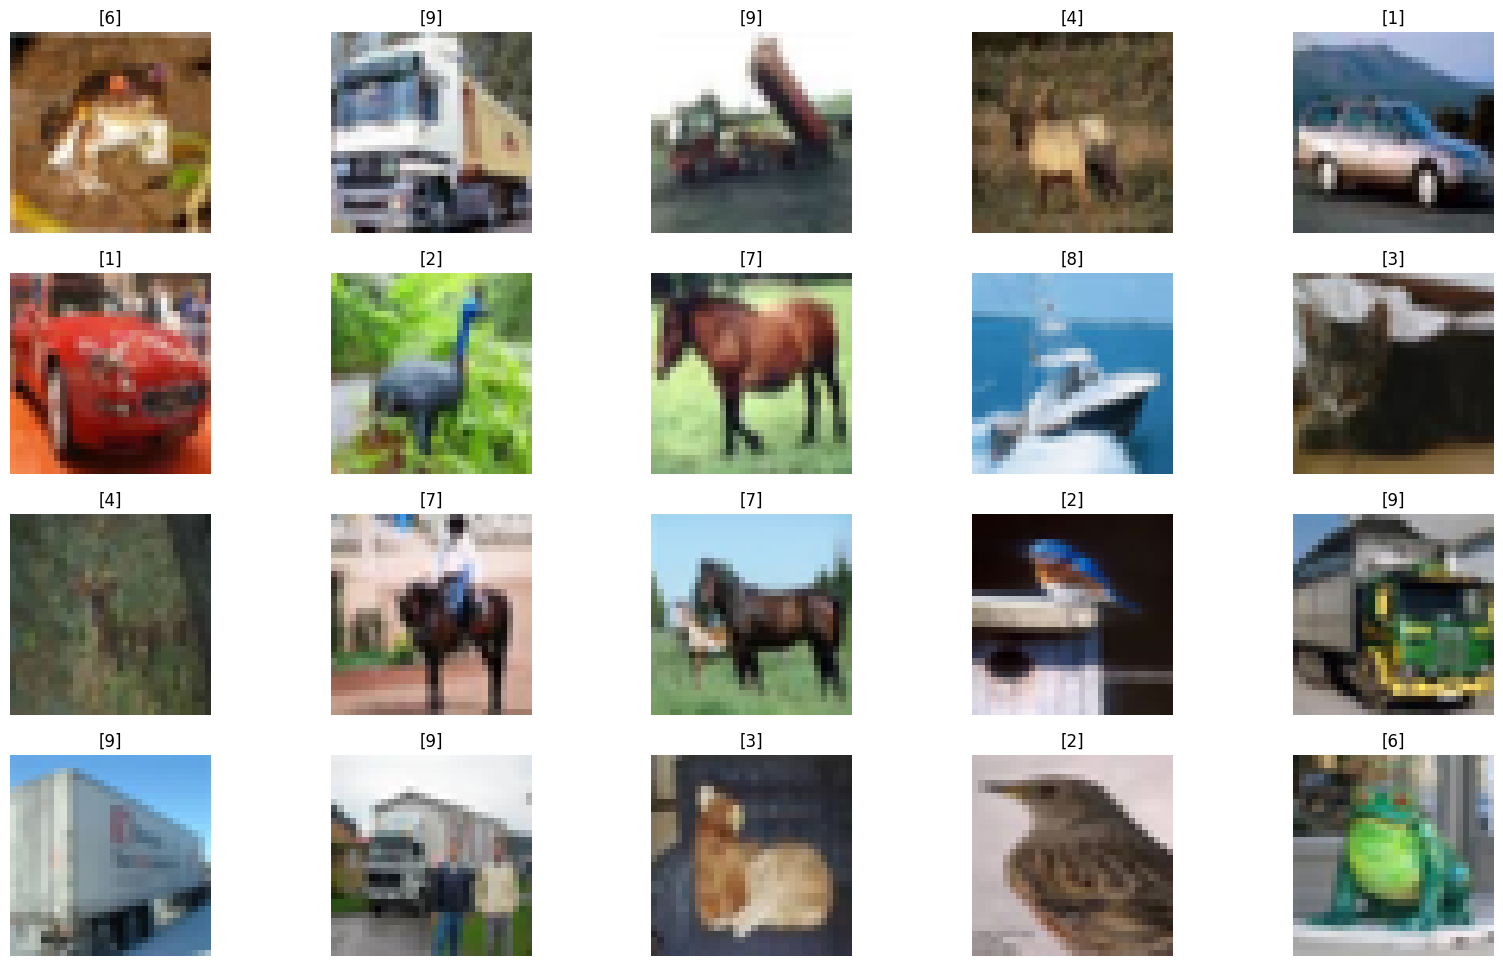

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_x[i])
    plt.title(f'{train_y[i]}')
    plt.axis('off')
    

plt.show()

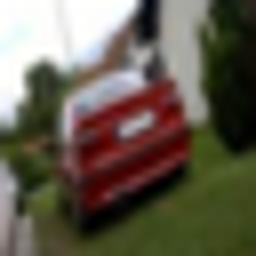

In [34]:
from PIL import Image
A=Image.fromarray(train_x[4050]).resize((256,256))
A

In [25]:
import numpy as np
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [35]:
train_x.shape

(50000, 32, 32, 3)

In [101]:
from tensorflow.keras.layers import Flatten,Dropout
cnn=Sequential()
cnn.add(InputLayer(input_shape=(32,32,3)))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',padding='same',strides=(1,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),activation='relu',padding='valid',strides=(1,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(units=256,activation='relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(units=32,activation='relu'))

cnn.add(Dense(units=10,activation='softmax'))
cnn.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 123,210 (481.29 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early=EarlyStopping(monitor='val_accuracy',restore_best_weights=True)
check=ModelCheckpoint(filepath='/home/hyuksu/projects/ml/deeplearning study/cnn_p/model/model_val{val_accuracy:.3f}.keras',monitor='val_accuracy',save_best_only=True,verbose=1)

In [103]:
from tensorflow.keras.optimizers import  Adam

cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
train_t=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)
test_t=ImageDataGenerator(rescale=1./255)

In [109]:
train_gen=train_t.flow(train_x,train_y,batch_size=32,shuffle=True)
test_gen=test_t.flow(test_x,test_y,batch_size=32,shuffle=True)

In [111]:
cnn.fit(train_gen,validation_data=(test_gen),epochs=30,batch_size=32)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3231 - loss: 1.8249 - val_accuracy: 0.4213 - val_loss: 1.5822
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4256 - loss: 1.5659 - val_accuracy: 0.4961 - val_loss: 1.3808
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4914 - loss: 1.4129 - val_accuracy: 0.5575 - val_loss: 1.2345
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5585 - loss: 1.2498 - val_accuracy: 0.6262 - val_loss: 1.0871
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6105 - loss: 1.1155 - val_accuracy: 0.6644 - val_loss: 0.9723
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6449 - loss: 1.0268 - val_accuracy: 0.6597 - val_loss: 0.9903
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6627 - loss: 0.9700 - val_accuracy: 0.6951 - val_loss: 0.8818
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6780 -